<font size="12">Hearts For Anjali<font size="12">

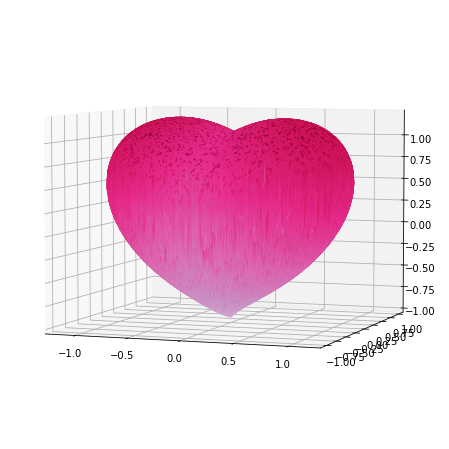

In [77]:
import plotly.graph_objects as go
import numpy as np
import plotly.express as px
import pandas as pd
import chart_studio.plotly as py
import plotly.io as pio
import matplotlib.pyplot as plt 


def get_zvalue(a, b, x, y):
    """
    Finds the roots of the polynomial in z
    for given values of
    a, b, x, y.
    """
    constant = x ** 2 + ((1 + b) * y) ** 2 - 1
    c0 = constant ** 3
    c1 = 0.0
    c2 = 3 * (constant ** 2)
    c3 = -(a * (y ** 2) + x ** 2)
    c4 = 3 * constant
    c5 = 0.0
    c6 = 1.0

    coefficients = [c6, c5, c4, c3, c2, c1, c0]
    rts = np.roots(coefficients)
    z = rts[~np.iscomplex(rts)]

    if len(z) > 0:
        zreal = z.real
        return zreal
    else:
        return []


def draw_heart(a=9/200, b=0.01, grid=0.01, palette='viridis'):
    """
    Draws the figure
    @param a: a>0
    @param b:
    @param grid: sparsity of the scatter
    @param palette: palette
    """
    x = np.arange(-2, 2, grid)
    y = x

    all_triplets = []
    for i in x:
        for j in y:
            zaxis = get_zvalue(a, b, i, j)
            for k in zaxis:
                triplet = [i, j, k]
                all_triplets.append(triplet)
    results = np.array(all_triplets).transpose()

    # Save the triplets in a data frame
    xaxis = results[0]
    yaxis = results[1]
    zaxis = results[2]

    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection = '3d')
    ax.view_init(5, -70) 
    ax.plot_trisurf(xaxis,yaxis,zaxis,cmap = palette)
    plt.show()


draw_heart(palette='PuRd')

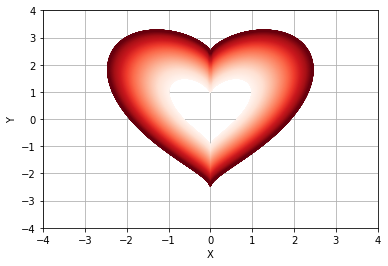

In [65]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 201)
y = np.linspace(-4.0, 4.0, 201)
X, Y = np.meshgrid(x, y)
eq = np.power(X, 2) + np.power(Y - np.cbrt(np.power(X, 2)), 2) - 1

levels = [0 + i*0.001 for i in range(0, 5000)]
plt.contour(X, Y, eq, levels, cmap="Reds")
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()
